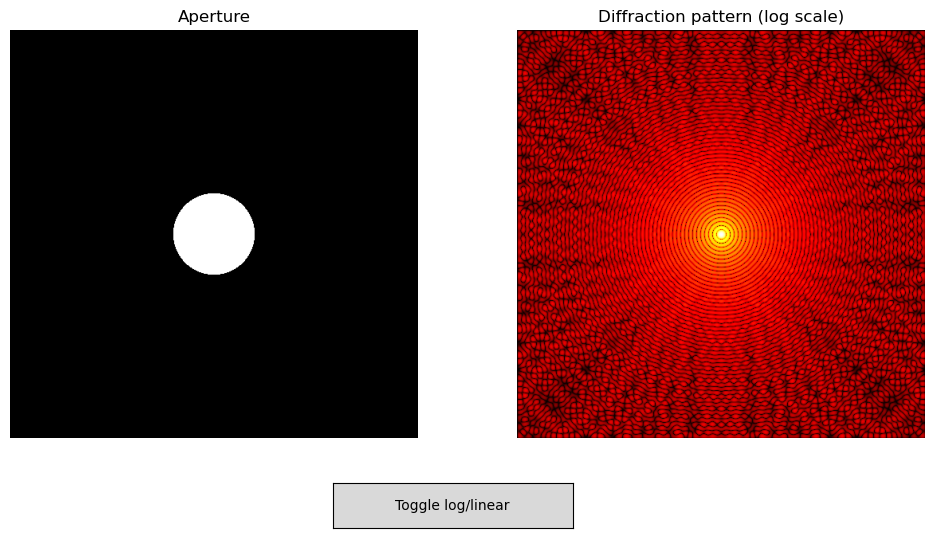

In [ ]:
"""
Diffraction Pattern Simulator

This script allows you to generate and visualize the diffraction (Fraunhofer) pattern
of a given aperture. You can choose from predefined shapes (circular, slit, square)
or load a custom aperture from an image file.

Date: [13th July, 2025]
"""

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def create_circular_aperture(N, radius_frac):
    """
    Create a circular aperture.

    Parameters:
        N (int): Size of the array (NxN).
        radius_frac (float): Radius as a fraction of half the array size (0 to 1).

    Returns:
        np.ndarray: Aperture array.
    """
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    aperture = np.zeros((N, N))
    aperture[R <= radius_frac] = 1
    return aperture


def create_slit_aperture(N, width_frac):
    """
    Create a rectangular slit aperture.

    Parameters:
        N (int): Size of the array.
        width_frac (float): Width as a fraction of full width (0 to 1).

    Returns:
        np.ndarray: Aperture array.
    """
    aperture = np.zeros((N, N))
    half_width = int((width_frac * N) / 2)
    center = N // 2
    aperture[:, center - half_width:center + half_width] = 1
    return aperture


def create_square_aperture(N, size_frac):
    """
    Create a square aperture.

    Parameters:
        N (int): Size of the array.
        size_frac (float): Side length as a fraction of full array (0 to 1).

    Returns:
        np.ndarray: Aperture array.
    """
    aperture = np.zeros((N, N))
    half_size = int((size_frac * N) / 2)
    center = N // 2
    aperture[center - half_size:center + half_size, center - half_size:center + half_size] = 1
    return aperture


def load_image_aperture(image_path, N):
    """
    Load a custom aperture from an image file.

    Parameters:
        image_path (str): Path to image.
        N (int): Desired output array size.

    Returns:
        np.ndarray: Aperture array normalized to [0, 1].
    """
    img = Image.open(image_path).convert("L").resize((N, N))
    aperture = np.array(img) / 255.0
    return aperture


def compute_diffraction_pattern(aperture):
    """
    Compute the Fraunhofer diffraction pattern from an aperture.

    Parameters:
        aperture (np.ndarray): Aperture array.

    Returns:
        np.ndarray: Normalized intensity pattern.
    """
    fft_result = np.fft.fftshift(np.fft.fft2(aperture))
    intensity = np.abs(fft_result) ** 2
    intensity /= np.max(intensity)  # Normalize to [0, 1]
    return intensity


def plot_aperture_and_pattern(aperture, pattern, log_scale=True):
    """
    Plot the aperture and diffraction pattern.

    Parameters:
        aperture (np.ndarray): Aperture array.
        pattern (np.ndarray): Diffraction pattern intensity array.
        log_scale (bool): If True, show diffraction pattern in logarithmic scale.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(aperture, cmap='gray')
    axs[0].set_title("Aperture")
    axs[0].axis('off')

    if log_scale:
        pattern_to_show = np.log10(pattern + 1e-8)  # Avoid log(0)
        axs[1].imshow(pattern_to_show, cmap='hot')
        axs[1].set_title("Diffraction pattern (log scale)")
    else:
        axs[1].imshow(pattern, cmap='hot')
        axs[1].set_title("Diffraction pattern (linear scale)")

    axs[1].axis('off')
    plt.tight_layout()
    plt.show()


def main():
    # -------------------------
    # Configuration
    # -------------------------
    N = 512  # Array size

    # Choose one of these options
    shape = "circle"       # Options: "circle", "slit", "square", "image"
    image_path = "my_aperture.png"  # Path if using image

    # Parameters for shapes
    radius_frac = 0.2   # For circle
    width_frac = 0.05   # For slit
    size_frac = 0.3     # For square

    # -------------------------
    # Generate aperture
    # -------------------------
    if shape == "circle":
        aperture = create_circular_aperture(N, radius_frac)
    elif shape == "slit":
        aperture = create_slit_aperture(N, width_frac)
    elif shape == "square":
        aperture = create_square_aperture(N, size_frac)
    elif shape == "image":
        aperture = load_image_aperture(image_path, N)
    else:
        raise ValueError("Unknown shape selected!")

    # -------------------------
    # Compute diffraction
    # -------------------------
    pattern = compute_diffraction_pattern(aperture)

    # -------------------------
    # Plot
    # -------------------------
    plot_aperture_and_pattern(aperture, pattern, log_scale=True)


if __name__ == "__main__":
    main()
